<h3> Linear Regression </h3>

<h4>Linear regression model prediction</h4>

$\hat{Y} = \hat{\theta}_{0}+\sum\limits_{j=1}^{p}X_{j}\hat{\theta}_{j}$


<li> $\hat{Y}$ = predicted value

<li> p = number of feature

<li> $x_{j}$  = $j$th feature value

<li> $\hat{\theta}_{0}$ = bias term

<li> $\hat{\theta}_{1},\hat{\beta}_{2},... \hat{\theta}_{p}$ = feature weights 
    
    
<h4>Vectorized Form : </h4>
  
$\hat{Y} = {h}_{\theta}(X) ={\theta}^T.{X}$  


<li> ${\theta}$ is the model’s parameter vector, containing the bias term ${\theta}_{0}$ and the feature weights ${\theta}_{1}$ to ${\theta}_{n}$
<li> ${\theta}^T$ is the transpose of ${\theta}$ (a row vector instead of a column vector).
<li> X is the instance’s feature vector, containing ${x}_{0}$ to ${x}_{n}$ , with  ${x}_{0}$ always equal to 1.
<li> ${\theta}^T·{X}$ is the dot product
<li> ${h}_{\theta}$ is the hypothesis function, using the model parameters ${\theta}$.
    
    
<h4>Cost Function</h4>    

${MSE}({X},{h}_{\theta})=(\frac{1}{m})\sum_{i=1}^{m}({\theta}^T x^i - y^i )^{2}$
    
<h4> Normal Equation </h4>    
    
$\hat{\theta} = (X^TX)^{-1} X^Ty$   

<li> $\hat{\theta}$  is the value of ${\theta}$  that minimizes the cost function.
<li> y is the vector of target values containing ${y}^1 to {y}^m$


In [1]:
#To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

<h3>Linear Regression with Normal Equation

In [2]:
import numpy as np
np.random.seed(42)
x= 2*np.random.rand(100,1)
y= 4+3*x+np.random.randn(100,1)

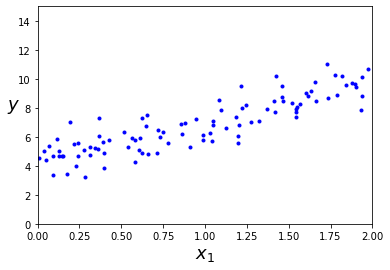

In [3]:
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
x_b = np.c_[np.ones((100,1)),x]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

In [5]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]  # add x0 = 1 to each instance
y_predict = x_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

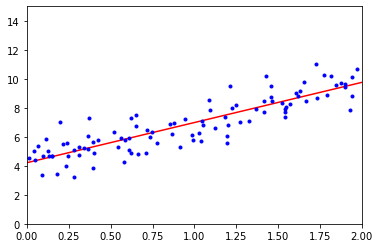

In [6]:
plt.plot(x_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

<h4>Singular Value Decomposition </h4>
 
 That can decompose the training set matrix X into the matrix multiplication of three matrix $U\Sigma V^{T}$ 

<h3>Gradient Descent</h3>
Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function.
It's based on a convex function and tweaks its parameters iteratively to minimize a given function to its local minimum.

<h4>Learning Rate</h4>
How big the steps are gradient descent takes into the direction of the local minimum are determined by the learning rate, which figures out how fast or slow we will move towards the optimal weights.


</h4>Types of Gradient Descent</h4>
There are three popular types of gradient descent that mainly differ in the amount of data they use: 

<h5>BATCH GRADIENT DESCENT</h5>
Batch gradient descent, also called vanilla gradient descent, calculates the error for each example within the training dataset, but only after all training examples have been evaluated does the model get updated. 

<h5>STOCHASTIC GRADIENT DESCENT</h5>
Stochastic gradient descent (SGD) does this for each training example within the dataset, meaning it updates the parameters for each training example one by one. One advantage is the frequent updates allow us to have a pretty detailed rate of improvement.
The frequent updates, however, are more computationally expensive than the batch gradient descent approach. Additionally, the frequency of those updates can result in noisy gradients, which may cause the error rate to jump around instead of slowly decreasing.

<h5>MINI-BATCH GRADIENT DESCENT</h5>
Mini-batch gradient descent is the go-to method since it’s a combination of the concepts of SGD and batch gradient descent. It simply splits the training dataset into small batches and performs an update for each of those batches. This creates a balance between the robustness of stochastic gradient descent and the efficiency of batch gradient descent.

<h4>Linear regression using batch gradient descent</h4>

${\beta}^{(next step)} = {\beta} - learningRate*Error$

<h3> Polynomial Regression</h3>

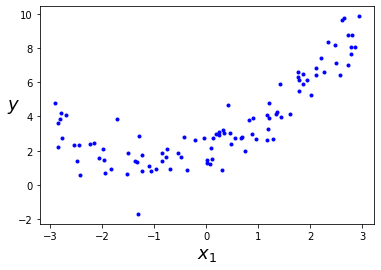

In [8]:
x= 6*np.random.rand(100,1)-3
y= 0.5*x**2+x+2+np.random.randn(100,1)

plt.plot(x,y,"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly_features= PolynomialFeatures(degree=2,include_bias=False)
x_poly = poly_features.fit_transform(x)

lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
 
lin_reg.coef_,lin_reg.intercept_

(array([[1.04630034, 0.5015459 ]]), array([1.99958228]))

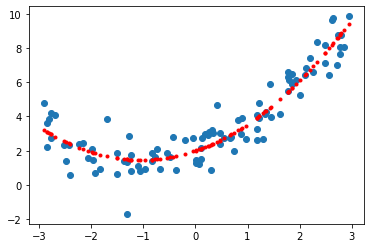

In [10]:
plt.scatter(x, y)
plt.plot(x,lin_reg.predict(x_poly),"." , linewidth=2, label="Predictions",color="r")
plt.show()

Mean Square Error

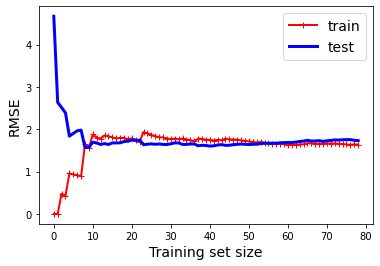

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

lin_reg = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

train_errors, test_errors = [], []
for m in range(1,len(x_train)):
    lin_reg.fit(x_train[:m], y_train[:m])
    y_train_predict = lin_reg.predict(x_train[:m])
    y_test_predict = lin_reg.predict(x_test)
    train_errors.append(np.sqrt(mean_squared_error(y_train[:m], y_train_predict)))
    test_errors.append(np.sqrt(mean_squared_error(y_test, y_test_predict)))

plt.plot(train_errors, "r-+", linewidth=2, label="train")
plt.plot(test_errors, "b-", linewidth=3, label="test")
plt.legend(loc="upper right", fontsize=14)   # not shown in the book
plt.xlabel("Training set size", fontsize=14) # not shown
plt.ylabel("RMSE", fontsize=14) 
plt.show()

when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the
training data perfectly, both because the data is noisy and because it is not linear at all. 

The error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set
doesn’t make the average error much better or worse

 We can try higher degree linear regression , which might help on to reduce the error  

<h4>THE BIAS/VARIANCE TRADEOFF </h4>

<h5>Bias</h5>
This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.
<h5>Variance</h5>
This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom(such as a high-degree polynomial model) is likely to have high variance, and thus to overfit the training data.
<h5>Irreducible error</h5>
This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data 

Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a <b>tradeof</b>

<h4>Regularized Linear Models</h4>
 A method to constrains/ regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.this is typically achieved by constraining the weights of the models. 
 
 Few Types of Regularized Regresssion:
 
 <b>Ridge Regression</b>
    
 Cost function : 
 
 ${J}({\theta}) = {MSE}({\theta}) +{\alpha}{\frac{1}{2}}{\sum}_{i=1}^{n}{\theta}_{i}^{2}$ 
    
  <li>the bias term ${\theta}_0$ is not regularized (the sum starts at i = 1, not ${\theta}$).  
  <li>the ℓ2 norm of the weight vector  
    
    


In [12]:
np.random.seed(42)
X = 3 * np.random.rand(100, 1)
y = 1 + 0.5 * X + np.random.randn(100, 1) / 1.5

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(x, y)
ridge_reg.predict([[1.5]])

array([[1.73690106]])

<b>Lasso Regression </b>
     
Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm 
     
<b>Cost Function</b> 

${J}({\theta}) = {MSE}({\theta}) +{\alpha}{\sum}_{i=1}^{n}|{\theta}_{i}|$ 

In [13]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x, y)
lasso_reg.predict([[1.5]])

array([1.70455087])

<b>ELastic Net</b>  

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression

${J}({\theta}) = {MSE}({\theta}) + r{\alpha}{\sum}_{i=1}^{n}|{\theta}_{i}| + {\frac{1-r}{2}} {\alpha}{\sum}_{i=1}^{n}{\theta}_i^2 $ 

Ridge is a good default, but if you suspect that only a few featuresare actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features'weights down to zero as we have discussed. 

In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.


In [14]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(x, y)
elastic_net.predict([[1.5]])

array([1.71429802])

<h3>Early Stopping </h3>

Stopping training as soon as the validation error reaches a minimum. This is early stopping 



<h3> Logistic regression </h3>

<b>Estimating Probabilities</b>

this model computes a weighted sum of input features(plue a bias term).

$\hat{p} = {h}_{\theta}(x) = \sigma(x^T{\theta})$

$\sigma(.)$ is a sigmoid function and output number between 0 and 1.

eq:- logistic function  $\sigma(t) = \frac{1}{1+e^{-t}}$


$\hat{y} = 
  \begin{cases}
    0 &\text{if }\hat{p} <0.5 \\
    1 &\text{if }\hat{p} >0.5 
  \end{cases}$
  
  
If $\sigma(t)$ < 0.5 when t < 0 
   $\sigma(t)$ > 0.5 when t >= 0 
  so a logistic regression model predicts 1 if $x^T{\theta}$    is positive and 0 if it is negative
  
  
<b>logistic regression cost function</b>  

${J}({\theta}) = -\frac{1}{m}{\sum}_{i=1}^{m}[y^{(i)}{log}(\hat{p}^{(i)})+ (1-y^{(i)}){log}(1-\hat{p}^{(i)})]$  


<b> logistic cost function partial derivatives </b>


$\frac{\partial}{\partial{\theta}_j} J{\theta} = \frac{1}{m}{\sum}_{i=1}^{m}(\sigma({\theta}^Tx^{(i)})-y^{(i)}){x}_j^{(i)}$  


<h3> Decision Boundary</h3>

In [15]:

from sklearn import datasets
iris = datasets.load_iris()

X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if virginica, else 0

In [16]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

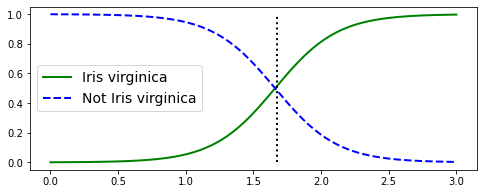

In [17]:
X_new = np.linspace(0, 3, 150).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2)
plt.legend(loc="center left", fontsize=14)
plt.show()



<h3>Softmax Regression</h3>

Multiclass Logistic Regression also known as Softmax Regression or Multinomial Logistic Regression


when given an instance x, the Softmax Regression model first computes a score $s_k(x)$ for each class k, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores.


<b>Softmax score for class k</b>

$s_k(x) = x^T{\theta}^{(k)}$


<b>Softmax Function</b>

$\hat{p}_k = \sigma(s(x))_k = \frac{\text{exp }(s_k(x))}{{\sum}_{j=1}^{K} \text{exp }(s_j(x))}$